Siddharth Das

TASK-3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [3]:
from google.colab import files
uploaded=files.upload()
data=pd.read_csv('SampleSuperstore (1).csv')

Saving SampleSuperstore (1).csv to SampleSuperstore (1).csv


In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
datax=data.copy()
datax=datax.drop(['Postal Code'],axis=1)
datax

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
datax.describe(include='all')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


There are no missing values as count of each column is same

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


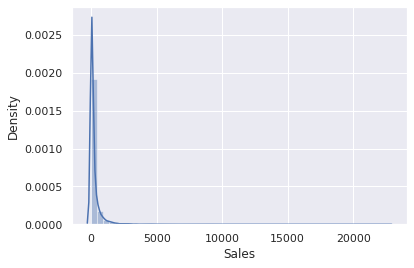

In [ ]:
sns.distplot(datax['Sales'])


In [13]:
q=data['Sales'].quantile(0.99)
data1=data[data['Sales']<q]
data1.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9894,9894,9894,9894,9894,9894.000000,9894,9894,9894,9894.000000,9894.000000,9894.000000,9894.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5910,5141,9894,897,1979,NaN,3172,6000,1508,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55258.275622,NaN,NaN,NaN,186.392229,3.765616,0.156473,20.053044
std,NaN,NaN,NaN,NaN,NaN,32037.580817,NaN,NaN,NaN,323.606129,2.208377,0.206844,120.849844
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-3701.892800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.042500,2.000000,0.000000,1.712025
50%,NaN,NaN,NaN,NaN,NaN,57252.000000,NaN,NaN,NaN,52.575000,3.000000,0.200000,8.496600
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,201.026000,5.000000,0.200000,28.512750


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


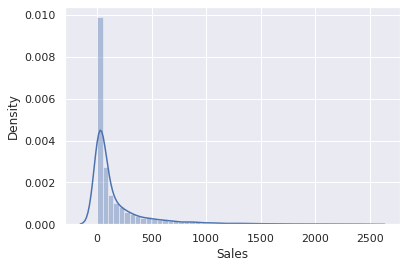

In [14]:
sns.distplot(data1['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


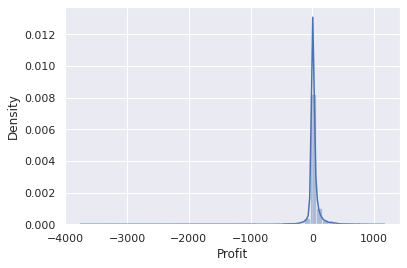

In [15]:
sns.distplot(data1['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


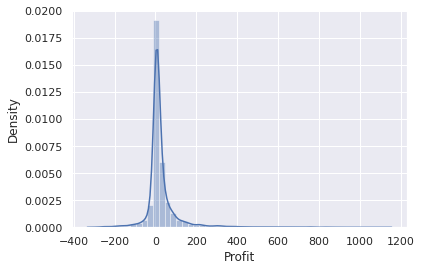

In [17]:
q=data1['Profit'].quantile(0.01)
data2=data1[data1['Profit']>q]
data2.describe(include='all')
sns.distplot(data2['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


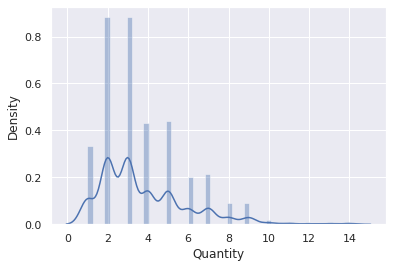

In [18]:
sns.distplot(data2['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


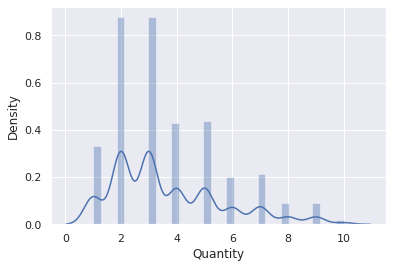

In [19]:
q=data2['Quantity'].quantile(0.99)
data3=data2[data2['Quantity']<q]
sns.distplot(data3['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


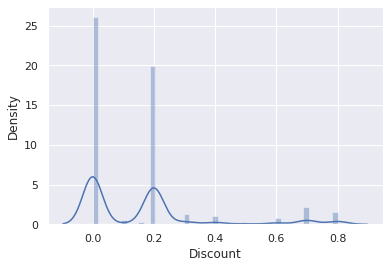

In [20]:
sns.distplot(data3['Discount'])

In [21]:
data3.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9690,9690,9690,9690,9690,9690.000000,9690,9690,9690,9690.000000,9690.000000,9690.000000,9690.000000
unique,4,3,1,530,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5776,5036,9690,880,1950,NaN,3115,5898,1457,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55269.469763,NaN,NaN,NaN,176.456311,3.654696,0.152374,26.085214
std,NaN,NaN,NaN,NaN,NaN,32073.973342,NaN,NaN,NaN,306.676572,2.015540,0.202682,82.895530
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-292.987200
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,16.560000,2.000000,0.000000,1.816000
50%,NaN,NaN,NaN,NaN,NaN,57103.000000,NaN,NaN,NaN,50.226000,3.000000,0.200000,8.509450
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,191.983000,5.000000,0.200000,28.286375


In [39]:
data4.head()

,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Furniture,Chairs,731.940,3,0.0,219.5820
2,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Furniture,Furnishings,48.860,7,0.0,14.1694


This is the final data after handling outliers

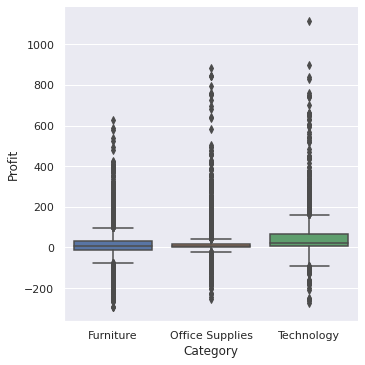

In [38]:
data4=data3.drop(['Ship Mode','Segment','Country','City','State','Postal Code','Region'],axis=1)
data4.head()
sns.catplot(x=data4['Category'],y=data4['Profit'],kind='box',data=data4)

Market incurs least profit while selling Furniture whereas most profit while selling Technology 

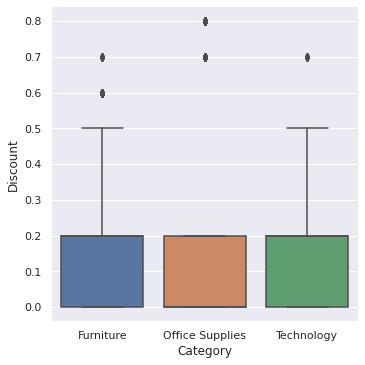

In [37]:
data4.head()
sns.catplot(x=data4['Category'],y=data4['Discount'],kind='box',data=data4)

From the above graph it can be deduced that the market provides more relative discount in case of furniture as compared to technology

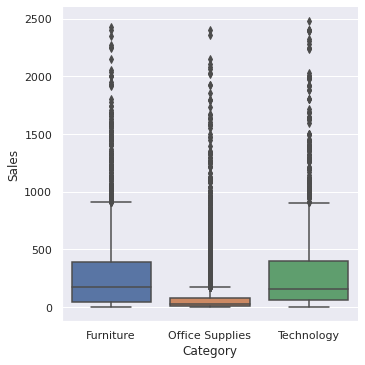

In [40]:
sns.catplot(x=data4['Category'],y=data4['Sales'],kind='box',data=data4)

CONCLUSION: Profit in case of Furniture being less than Technology(Loss is more), Market can decrease the amount of discount a bit incase of Furniture as Sales of both technology and Furniture are somewhat same. Also market can give attention to office supplies where sales is less